# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like:

- the `Rating` of the company given by the employee,
- the `Company Name`,
- the `Job Title` of the employee,
- the employee `Salary` (in Indian Rupee ₹),
- the number of `Salaries Reported`,
- the `Location` of the company,
- the `Employment Status` and
- the category of the `Job Roles`

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition.

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type.

### Setup
Installo la libreria e carico i dati presenti nei .csv in un dataframe

In [5]:
# Installa la libreria all'interno del Notebook
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Carica il primo file CSV in un DataFrame
sps = pd.read_csv('data/Software Professionals Salary.csv')

# Controlla la tipologia di dati per ogni colonna
print(sps.dtypes)


Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object


### Visualizzazione del dataframe

In [7]:
display(sps)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


1. What is the shape (rows, cols) of the `sps` DataFrame?

In [8]:
# Utilizza l'attributo shape per determinare la forma del dataframe
forma = sps.shape

# Riporta il numero di righe e colonne
righe = forma[0]
colonne = forma [1]

print("Forma: ",forma)
print("Numero di righe: ",righe)
print("Numero di colonne:",colonne)

Forma:  (22770, 8)
Numero di righe:  22770
Numero di colonne: 8


2. How many unique `Job Roles` are there in the dataset?

In [9]:
# Calcola il numero di "Job Roles" unici presenti nel dataset
unique_job_roles = sps['Job Roles'].nunique()

print('Numero di "Job Roles" unici: ', unique_job_roles)

Numero di "Job Roles" unici:  11


3. How many unique `Job Title` are there for the "Python" `Job Role`?

In [10]:
#Calcola il numero di "Job Title" unici presenti nel dataset
python_job_titles_count = sps[sps['Job Roles'] == 'Python']['Job Title'].nunique()

print('Numero di "Job Title" unici: ', python_job_titles_count)

Numero di "Job Title" unici:  102


4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [11]:
# Calcola il numero di aziende nel DataFrame che hanno come "Job Role" Python
aziende_python_analyst = sps.loc[(sps['Job Roles'] == 'Python') & (sps['Job Title'].str.contains('Analyst', case=False)), 'Company Name']
numero_aziende_uniche = aziende_python_analyst.nunique()

print("Numero di aziende con Ruolo di lavoro Python e Titolo di lavoro Analyst: ", numero_aziende_uniche)

Numero di aziende con Ruolo di lavoro Python e Titolo di lavoro Analyst:  3


5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [12]:
# Raggruppa il DataFrame sps in base alla colonna "Company Name" e calcola la somma dei "Salaries Reported" 
company_with_highest_salaries = sps.groupby('Company Name')['Salaries Reported'].sum().idxmax()

print("Nome dell'azienda con il maggior numero di Salaries Reported:", company_with_highest_salaries)

Nome dell'azienda con il maggior numero di Salaries Reported: Amazon


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in?

In [13]:
# Visualizza e calcola il numero di territori in cui è presente l'azienda
selected_company = sps[sps['Company Name']== 'Amazon']
num_locations = selected_company['Location'].nunique()

print("Numero di territori in cui è presente l'azienda", num_locations)

Numero di territori in cui è presente l'azienda 9


### Setup Esercizio 7
Installo la libreria requests

In [14]:
# Scarico la libreria requests
%pip install requests

Note: you may need to restart the kernel to use updated packages.


7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [15]:
import requests

# Invia una GET request all'API
response = requests.get('https://api.exchangerate-api.com/v4/latest/INR')

# Partiziona la risposta come JSON e ottiene il tasso di conversione
data = response.json()
inr_to_usd = data['rates']['USD']

print('Il tasso di conversione da INR a USD è:', inr_to_usd)



# Crea una nuova colonna 'Salary USD' che converte 'Salary' da INR a USD
sps['Salary USD'] = (sps['Salary'] * inr_to_usd).round(0)

# Mostra le prime righe del DataFrame
sps.head()  

Il tasso di conversione da INR a USD è: 0.0122


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,4880.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12200.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3660.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7320.0


8. What is the average `Salary USD` for the "Python" `Job Role`?

In [16]:
# Filtra il DataFrame includendo solo le righe "Job Role" "Python" e calcola la media del campo "Salary USD" 
average_salary_python = sps[sps['Job Roles'] == 'Python']['Salary USD'].mean()
print('La media dello stipendio in USD per il ruolo di lavoro "Python" è:', average_salary_python)

La media dello stipendio in USD per il ruolo di lavoro "Python" è: 5929.503695881732


9. Which `Company Name` has the highest **average** `Salary EUR` across all `Job Title`s?

In [17]:
#Invia una GET request alla API "EUR conversion rate"
response_eur = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
data_eur = response_eur.json()
usd_to_eur = data_eur['rates']['EUR']

print('Il tasso di conversione da USD a EUR è:', usd_to_eur)

#Crea una nuova colonna 'Salary EUR' che converte 'Salary USD' in 'Salary EUR'
sps['Salary EUR'] = (sps['Salary USD'] * usd_to_eur).round(2)

#Effettua il Group by di 'Company Name', calcola 'Salary EUR' e trova la compagnia con il varole medio più alto
company_with_highest_avg_salary_eur = sps.groupby('Company Name')['Salary EUR'].mean().idxmax()

print(company_with_highest_avg_salary_eur)

Il tasso di conversione da USD a EUR è: 0.917
Thapar University


### Setup Esercizio 10
Scarico matplotlib


In [18]:
# Installo matplotlib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


10. Create a Plot that shows the **relationship** between the average `Salary EUR` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

### Setup esercizio 10
Scarico seaborn

In [19]:
# Installo seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


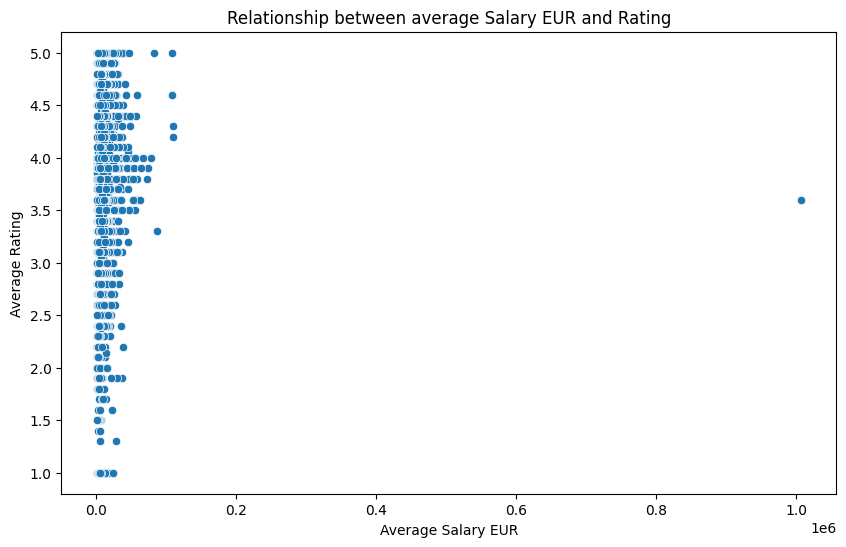

L'azienda che causa l'anomalia è: Thapar University


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la media di 'Salary EUR' e il 'Rating' per ogni compagnia
avg_data = sps.groupby('Company Name').agg({'Salary EUR': 'mean', 'Rating': 'mean'}).reset_index()

# Traccia i dati
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_data, x='Salary EUR', y='Rating')

plt.title('Relationship between average Salary EUR and Rating')
plt.xlabel('Average Salary EUR')
plt.ylabel('Average Rating')
plt.show()

# Trova la compagnia con il salario medio più alto
anomaly_company = avg_data.loc[avg_data['Salary EUR'].idxmax(), 'Company Name']
print("L'azienda che causa l'anomalia è:", anomaly_company)


In [21]:
%pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly.express as px

fig = px.scatter(avg_data, x='Salary EUR', y='Rating', hover_data=['Company Name'])
fig.update_layout(
    title='Relazione tra media "Salary EUR" e Rating',
    xaxis_title='Average Salary EUR',
    yaxis_title='Average Rating',
    yaxis=dict(range=[0.5, 5.5]),  # Imposta il range dell'asse delle ordinate da 0.5 a 5.5
    height=800  # Imposta l'altezza del grafico a 800 pixel
)
fig.show()